
<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Programación Lineal </font> </center>



> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="400px" height="125px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="350px" height="125px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf 

## 1. Apuntes históricos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="400px" height="125px" />

- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.


<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="125px" />

**Mencionar complejidad computacional.**

## 2. Motivación

Ya la clase pasada habíamos mencionado que cuando se quería optimizar una función de varias variables con restricciones, se podía aplicar siempre el método de Multiplicadores de Lagrange. Sin embargo, este método es computacionalmente muy complejo conforme crece el número de variables.

Por tanto, cuando la función a optimizar y las restricciones son de caracter lineal, los métodos de solución que se pueden desarrollar son computacionalmente eficientes, por lo que es útil realizar la distinción.

## 3. Problemas de programación lineal

### 3.1. Ejemplo básico
Una compañía produce dos productos ($X_1$ y $X_2$) usando dos máquinas ($A$ y $B$). Cada unidad de $X_1$ que se produce requiere 50 minutos en la máquina $A$ y 30 minutos en la máquina $B$. Cada unidad de $X_2$ que se produce requiere 24 minutos en la máquina $A$ y 33 minutos en la máquina $B$.

Al comienzo de la semana hay 30 unidades de $X_1$ y 90 unidades de $X_2$ en inventario. El tiempo de uso disponible de la máquina $A$ es de 40 horas y el de la máquina $B$ es de 35 horas.

La demanda para $X_1$ en la semana actual es de 75 unidades y de $X_2$ es de 95 unidades. La política de la compañía es maximizar la suma combinada de unidades de $X_1$ e $X_2$ en inventario al finalizar la semana.

Formular el problema de decidir cuánto hacer de cada producto en la semana como un problema de programación lineal.

#### Solución

Sean:
- $x_1$ la cantidad de unidades de $X_1$ a ser producidas en la semana, y
- $x_2$ la cantidad de unidades de $X_2$ a ser producidas en la semana.

Notar que lo que se quiere es maximizar $x_1+x_2$.

Restricciones:
1. El tiempo de uso disponible de la máquina $A$ es de 40 horas: $50x_1+24x_2\leq 40(60)\Rightarrow 50x_1+24x_2\leq 2400$.
2. El tiempo de uso disponible de la máquina $B$ es de 35 horas: $30x_1+33x_2\leq 35(60)\Rightarrow 30x_1+33x_2\leq 2100$.
3. La demanda para $X_1$ en la semana actual es de 75 unidades: $x_1+30\geq 75\Rightarrow x_1\geq 45\Rightarrow -x_1\leq -45$.
4. La demanda para $X_2$ en la semana actual es de 95 unidades: $x_2+90\geq 95\Rightarrow x_2\geq 5\Rightarrow -x_2\leq -5$.

Finalmente, el problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_1,x_2} & -x_1-x_2 \\
\text{s. a. }  & 50x_1+24x_2\leq 2400 \\
               & 30x_1+33x_2\leq 2100 \\
               & -x_1\leq -45 \\
               & -x_2\leq -5,
\end{array}
\end{equation}

o, eqivalentemente 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
con
- $\boldsymbol{c}=\left[-1 \quad -1\right]^T$,
- $\boldsymbol{A}=\left[\begin{array}{cc}50 & 24 \\ 30 & 33\\ -1 & 0\\ 0 & -1\end{array}\right]$, y
- $\boldsymbol{b}=\left[2400\quad 2100\quad -45\quad -5\right]^T$.

Preferiremos, en adelante, la notación vectorial/matricial.

### 3.2. En general
De acuerdo a lo descrito anteriormente, un problema de programación lineal puede escribirse en la siguiente forma:

\begin{equation}
\begin{array}{ll}
\min_{x_1,\dots,x_n} & c_1x_1+\dots+c_nx_n \\
\text{s. a. }        & a^{eq}_{j,1}x_1+\dots+a^{eq}_{j,n}x_n=b^{eq}_j \text{ para } 1\leq j\leq m_1 \\
                     & a_{k,1}x_1+\dots+a_{k,n}x_n\leq b_k \text{ para } 1\leq k\leq m_2,
\end{array}
\end{equation}
donde:
- $x_i$ para $i=1,\dots,n$ son las incógnitas o variables de decisión,
- $c_i$ para $i=1,\dots,n$ son los coeficientes de la función a optimizar,
- $a^{eq}_{j,i}$ para $j=1,\dots,m_1$ e $i=1,\dots,n$, son los coeficientes de la restricción de igualdad,
- $a_{k,i}$ para $k=1,\dots,m_2$ e $i=1,\dots,n$, son los coeficientes de la restricción de desigualdad,
- $b^{eq}_j$ para $j=1,\dots,m_1$ son valores conocidos que deben ser respetados estrictamente, y
- $b_k$ para $k=1,\dots,m_2$ son valores conocidos que no deben ser superados.

Equivalentemente, el problema puede escribirse como

\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
donde:
- $\boldsymbol{x}=\left[x_1\quad\dots\quad x_n\right]^T$,
- $\boldsymbol{c}=\left[c_1\quad\dots\quad c_n\right]^T$,
- $\boldsymbol{A}_{eq}=\left[\begin{array}{ccc}a^{eq}_{1,1} & \dots & a^{eq}_{1,n}\\ \vdots & \ddots & \vdots\\ a^{eq}_{m_1,1} & \dots & a^{eq}_{m_1,n}\end{array}\right]$,
- $\boldsymbol{A}=\left[\begin{array}{ccc}a_{1,1} & \dots & a_{1,n}\\ \vdots & \ddots & \vdots\\ a_{m_2,1} & \dots & a_{m_2,n}\end{array}\right]$,
- $\boldsymbol{b}_{eq}=\left[b^{eq}_1\quad\dots\quad b^{eq}_{m_1}\right]^T$, y
- $\boldsymbol{b}=\left[b_1\quad\dots\quad b_{m_2}\right]^T$.

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

#### Bueno, y una vez planteado, ¿cómo se resuelve el problema?

Este problema está sencillo pues solo es en dos variables. La solución gráfica es válida.

In [1]:
# Importar el módulo pyplot de la librería matplotlib, y la librería numpy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 50x1 + 24x2 <= 2400   ----> x2 = (2400-50x1)/24
# 30x1 + 33x2 <=2100    -----> x2 = (2100-30x1)/33
#-x1<=-45
#-x2<=-5


In [4]:
# Definir las funciones frontera de la región factible
def f1(x1):
    return (2400-50*x1)/24

def f2(x1):
    return (2100-30*x1)/33

In [5]:
# Vector independiente x1 y funciones evaluadas
x1 = np.linspace(0,100)
y1_x2 = f1(x1)
y2_x2 = f2(x1)


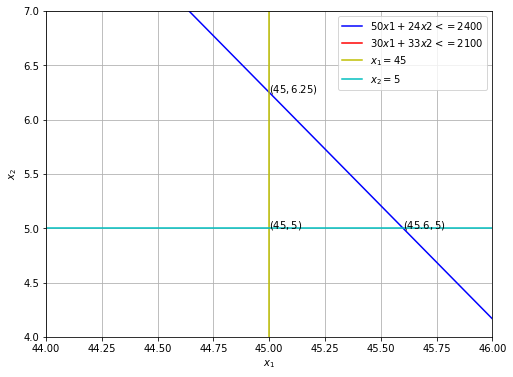

In [8]:
# Gráfica de la región factible y esquinas
plt.figure(figsize=(8,6))
plt.plot(x1,y1_x2, 'b', label= '$50x1 + 24x2 <= 2400 $')
plt.plot(x1,y2_x2, 'r', label= '$30x1 + 33x2 <=2100 $')
plt.axvline(x=45, c='y', label='$x_1 = 45$')
plt.axhline(y=5, c='c', label='$x_2 = 5$')

plt.text(45,5,'$(45,5)$')
plt.text(45,(2400-50*45)/24,f'$(45,{(2400-50*45)/24})$')
plt.text((2400-24*5)/50,5,f'$({(2400-24*5)/50},5)$')


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.grid()
plt.axis([44,46,4,7])
plt.show()

x1+x2

In [9]:
(45+5,45.6+5,45+6.25)

(50, 50.6, 51.25)

De acuerdo a la solución gráfica, debemos producir:

- 45 unidades de $X_1$, y
- 6.25 unidades de $X_2$.

Además, el inventario total de productos $X_1$ y $X_2$ al final de la semana es de 1.25 unidades.

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudiante, sólo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

- Solucion de manera gráfica


**restante de clase: 3 primeros que lo haga, y me lo mande bien explicado al correo, tiene 2 puntos para el primer examen.**

gdesirena@iteso.mx

**Máximizar la utilidad**




## 5. ¿Cómo se resuelve en python?

### 5.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/_static/images/scipy_med.png" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería. 

En particular, los siguientes son algunos de los paquetes básicos:
- `NumPy`
- **Librería `SciPy`**
- `SymPy`
- `matplotlib`
- `pandas`

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

In [ ]:
# Importar el módulo optimize de la librería scipy
# import scipy.optimize as opt


El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices ($f(x)=0$). Entre ellas se encuentra la función `linprog`

In [ ]:
# Función linprog del módulo optimize


\begin{align}
\min_x \ & c^T x \\
\mbox{such that} \ & A_{ub} x \leq b_{ub},\\
        & A_{eq} x = b_{eq},\\
        & l \leq x \leq u ,
\end{align}

la cual resuelve problemas como los que aprendimos a plantear.

### 5.2 Solución del ejemplo básico con linprog
Ya hicimos la solución gráfica. Contrastemos con la solución que nos da `linprog`...

- $\boldsymbol{c}=\left[-1 \quad -1\right]^T$,
- $\boldsymbol{A}=\left[\begin{array}{cc}50 & 24 \\ 30 & 33\\ -1 & 0\\ 0 & -1\end{array}\right]$, y
- $\boldsymbol{b}=\left[2400\quad 2100\quad -45\quad -5\right]^T$.

In [ ]:
# Importar numpy para crear las matrices


In [ ]:
# Crear las matrices para resolver el problema


In [ ]:
# Resolver utilizando linprog


In [ ]:
# Mostrar el resultado


In [ ]:
# Extraer el vector solución


**Conclusión**
- 45 unidades de $X_1$, y
- 6.25 unidades de $X_2$.

Además, el inventario total de productos $X_1$ y $X_2$ al final de la semana es de 1.25 unidades.

**Otra forma:** poner las cotas de las variables a parte

In [ ]:
# Escribir matrices y cotas


In [ ]:
# Resolver


In [ ]:
# Mostrar el resultado


**Actividad.** Resolver el ejemplo de Mónica y sus tiliches con `linprog`

In [ ]:
# Resolver acá


## 6. Problema de transporte 1
- **Referencia**: https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a0/Progr_Lineal.PNG" width="400px" height="125px" />

Este es un caso curioso, con solo 6 variables (un caso real de problema de transporte puede tener fácilmente más de 1.000 variables) en el cual se aprecia la utilidad de este procedimiento de cálculo.

Existen tres minas de carbón cuya producción diaria es:
- la mina "a" produce 40 toneladas de carbón por día;
- la mina "b" produce 40 t/día; y,
- la mina "c" produce 20 t/día.

En la zona hay dos centrales termoeléctricas que consumen:
- la central "d" consume 40 t/día de carbón; y,
- la central "e" consume 60 t/día.

Los costos de mercado, de transporte por tonelada son:
- de "a" a "d" = 2 monedas;
- de "a" a "e" = 11 monedas;
- de "b" a "d" = 12 monedas;
- de "b" a "e" = 24 monedas;
- de "c" a "d" = 13 monedas; y,
- de "c" a "e" = 18 monedas.

Si se preguntase a los pobladores de la zona cómo organizar el transporte, tal vez la mayoría opinaría que debe aprovecharse el precio ofrecido por el transportista que va de "a" a "d", porque es más conveniente que los otros, debido a que es el de más bajo precio.

En este caso, el costo total del transporte es:
- transporte de 40 t de "a" a "d" = 80 monedas;
- transporte de 20 t de "c" a "e" = 360 monedas; y,
- transporte de 40 t de "b" a "e" = 960 monedas,
    
Para un total 1.400 monedas.

Sin embargo, formulando el problema para ser resuelto por la programación lineal con
- $x_1$ toneladas transportadas de la mina "a" a la central "d"
- $x_2$ toneladas transportadas de la mina "a" a la central "e"
- $x_3$ toneladas transportadas de la mina "b" a la central "d"
- $x_4$ toneladas transportadas de la mina "b" a la central "e"
- $x_5$ toneladas transportadas de la mina "c" a la central "d"
- $x_6$ toneladas transportadas de la mina "c" a la central "e"

se tienen las siguientes ecuaciones:

Restricciones de la producción:

- $x_1 + x_2 \leq 40$
- $x_3 + x_4 \leq 40$
- $x_5 + x_6 \leq 20$

Restricciones del consumo:

- $x_1 + x_3 + x_5 \geq 40$
- $x_2 + x_4 + x_6 \geq 60$

La función objetivo será:

$$\min_{x_1,\dots,x_6}2x_1 + 11x_2 + 12x_3 + 24x_4 + 13x_5 + 18x_6$$

Resolver con `linprog`

In [ ]:
# Matrices y cotas


In [ ]:
# Mostrar resultado


**Conclusión**

- Se deben transportar 40 ton. de la mina "a" a la central "e" ($x_2$)
- Se deben transportar 40 ton. de la mina "b" a la central "d" ($x_3$)
- Se deben transportar 20 ton. de la mina "c" a la central "e" ($x_6$)

## 7. Optimización de inversión en bonos

**Referencia:**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gukxBus8lOs')

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.

Plantear restricciones...

In [ ]:
# Matrices y cotas


In [ ]:
# Resolver


In [ ]:
# Mostrar resultado


Recordar que en el problema minimizamos $-\sum^{6}_{i=1} A_iR_i$. El rendimiento obtenido es entonces:

**Conclusión**

- 

## 8. Tarea 

### 1. Diseño de la Dieta Óptima

Se quiere producir comida para gatos de la manera más barata, no obstante se debe también asegurar que se cumplan los datos requeridos de analisis nutricional. Por lo que se quiere variar la cantidad de cada ingrediente para cumplir con los estandares nutricionales. Los requisitos que se tienen es que en 100 gramos, se deben tener por lo menos 8 gramos de proteína y 6 gramos de grasa. Así mismo, no se debe tener más de 2 gramos de fibra y 0.4 gramos de sal.  

Los datos nutricionales se pueden obtener de la siguiente tabla:

|Ingrediente|Proteína|Grasa|Fibra|Sal|
|----|---- |---- |---- |---- |
|Pollo|  10.0%|08.0%|00.1%|00.2%
|Carne|  20.0%|10.0%|00.5%|00.5%
|Cordero|15.0%|11.0%|00.5%|00.7%
|Arroz|  00.0%|01.0%|10.0%|00.2%
|Trigo|  04.0%|01.0%|15.0%|00.8%
|Gel|    00.0%|00.0%|00.0%|00.0%

Los costos de cada producto son:

Ingrediente|Costo por gramo
:----|----
Pollo|$\$$0.013
Carne|$\$$0.008
Cordero|$\$$0.010
Arroz|$\$$0.002
Trigo|$\$$0.005
Gel|$\$$0.001    

Lo que se busca optimizar en este caso es la cantidad de productos que se debe utilizar en la comida de gato, para simplificar la notación se van a nombrar las siguientes variables: 

$x_1:$ Gramos de pollo  
$x_2:$ Gramos de carne  
$x_3:$ Gramos de cordero  
$x_4:$ Gramos de arroz  
$x_5:$ Gramos de trigo  
$x_6:$ Gramos de gel  

Con los datos, se puede plantear la función objetivo, está dada por la siguiente expresión:

$$\min 0.013 x_1 + 0.008 x_2 + 0.010 x_3 + 0.002 x_4 + 0.005 x_5 + 0.001 x_6$$

Las restricciones estarían dadas por el siguiente conjunto de ecuaciones:

$x_1+x_2+x_3+x_4+x_5+x_6=100$  

$(10.0 x_1+ 20.0 x_2+ 15.0 x_3+ 00.0 x_4+ 04.0 x_5+ 00.0 x_6)/100 \geq 8.0$  

$(08.0 x_1+ 10.0 x_2+ 11.0 x_3+ 01.0 x_4+ 01.0 x_5+ 00.0 x_6)/100 \geq 6.0$  

$(00.1 x_1+ 00.5 x_2+ 00.5 x_3+ 10.0 x_4+ 15.0 x_5+ 00.0 x_6)/100 \leq 2.0$  

$(00.2 x_1+ 00.5 x_2+ 00.7 x_3+ 00.2 x_4+ 00.8 x_5+ 00.0 x_6)/100 \leq 0.4$  

La primer condición asegura que la cantidad de productos que se usará cumple con los 100 gramos. Las siguientes sólo siguen los lineamientos planteados para cumplir con los requisitos nutrimentales. 

### 2. Otro problema de transporte

Referencia: https://relopezbriega.github.io/blog/2017/01/18/problemas-de-optimizacion-con-python/

Supongamos que tenemos que enviar cajas de cervezas de 2 cervecerías (Modelo y Cuauhtémoc Moctezuma) a 5 bares de acuerdo al siguiente gráfico:

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://relopezbriega.github.io/images/Trans_problem.png" width="500px" height="150px" />

Asimismo, supongamos que nuestro gerente financiero nos informa que el costo de transporte por caja de cada ruta se conforma de acuerdo a la siguiente tabla:

In [ ]:
#Crear dataframe
import pandas as pd
info = pd.DataFrame({'Bar1': [2, 3], 'Bar2': [4, 1], 'Bar3': [5, 3], 'Bar4': [2, 2], 'Bar5': [1, 3]}, index = ['CerveceriaA', 'CerveceriaB'])
info

Y por último, las restricciones del problema, van a estar dadas por las capacidades de oferta y demanda de cada cervecería (en cajas de cerveza) y cada bar, las cuales se detallan en el gráfico de más arriba.

Sean:
- $x_i$ cajas transportadas de la cervecería A al Bar $i$,
- $x_{i+5}$ cajas transportadas de la cervecería B al Bar $i$.

La actividad consiste en plantear el problema de minimizar el costo de transporte de la forma vista y resolverlo con `linprog`. 

